## Logistic regression for a binary classification with a regularization
<hr>

## 0. Import library
<hr>
Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


## 1. Training Data
<hr>

1-1. Load dataset

In [2]:
# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

1-2. Plot the training data

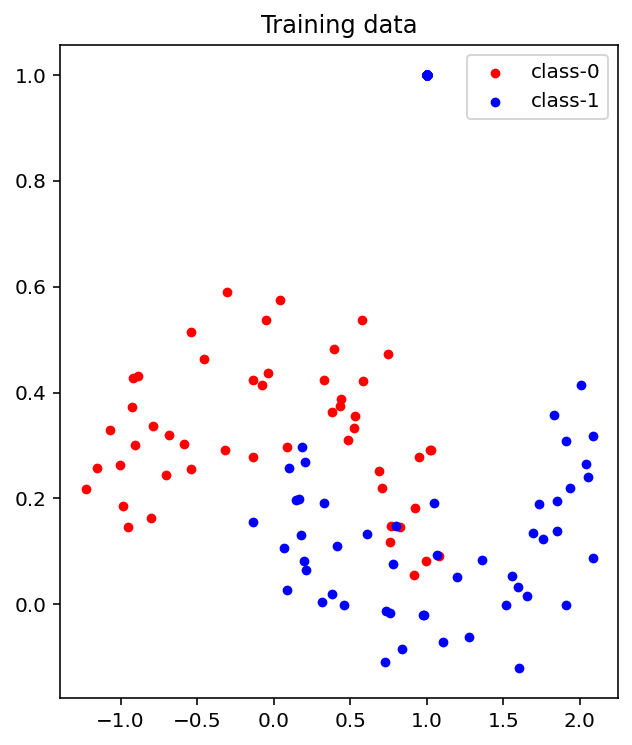

In [3]:
plt.figure(1,figsize=(5,6))
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=60, c='r', marker='.', label='class-0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=60, c='b', marker='.', label='class-1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Testing Data 
<hr>

2-1. Load dataset

In [4]:
# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

2-2. Plot the testing data

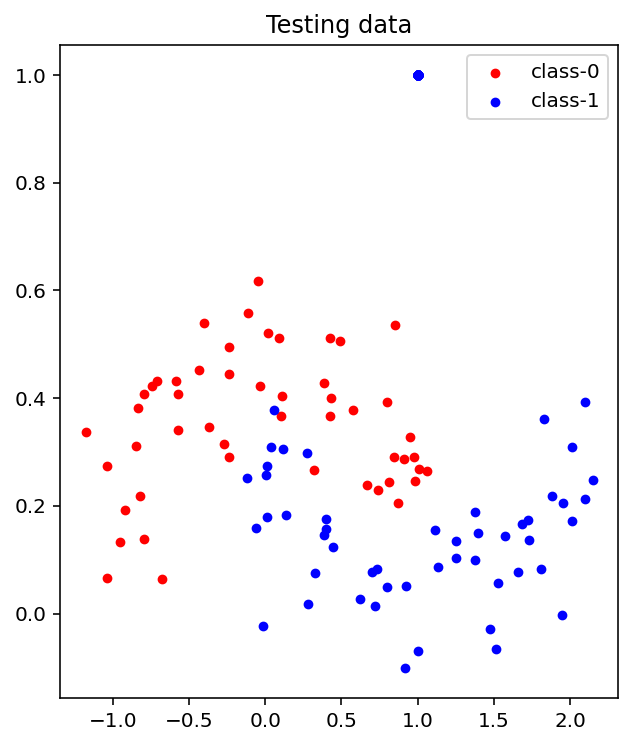

In [5]:
plt.figure(1,figsize=(5,6))
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=60, c='r', marker='.', label='class-0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=60, c='b', marker='.', label='class-1')
plt.title('Testing data')
plt.legend()
plt.show()

## 3. Logistic regression with a high dimensional feature function
<hr>

3-1. Sigmoid/logistic function
<hr>

$$
\sigma(\eta) = \frac{1}{1 + \exp^{-\eta}}
$$

In [6]:
def sigmoid(z):
    
    sigmoid_f = 1 / (1 + np.exp(-z))
    
    return sigmoid_f 

3-2 .define a prediction function
<hr>

$$
\begin{aligned}
z &= g(x, y;\theta)
\end{aligned}
$$

In [144]:
w_init = np.zeros([100, 1])
for i in range(100) :
    w_init[i] = random()

In [178]:
from random import *

def featureFunction(x, n):
    
    result = np.ones([n, 10])
    
    result[:, 0] = 1
    result[:, 1] = x
    result[:, 2] = x ** 2
    result[:, 3] = x ** 3
    result[:, 4] = x ** 4
    result[:, 5] = x ** 5
    result[:, 6] = x ** 6
    result[:, 7] = x ** 7
    result[:, 8] = x ** 8
    result[:, 9] = x ** 9
    
    return result


def makeXY(x, y):
    
    n = len(y)
    m = x.shape[1]
    result = np.zeros([n, 100])
    
    for i in range(n):
        for j in range(m):
            for k in range(m):
                result[i, j * 10 + k] =  x[i, j] * y[i, k]

    return result



def f_pred(xy, w):
    return sigmoid(np.dot(xy, w))

fx1_train = featureFunction(x1_train, number_data_train)
fx2_train = featureFunction(x2_train, number_data_train)
xy_train = makeXY(fx1_train, fx2_train)

print(fx1_train.shape)
print(fx2_train.shape)
print(xy_train.shape)

z_train = f_pred(xy_train, w_init)

(200, 10)
(200, 10)
(200, 100)


## 4. Objective Function with a regularization term
<hr>

4-1. define objective function

In [275]:
def loss_func(y_pred, y, lamda, w):
    n = len(y)
    epsilon = 1e-3
    loss = np.dot(-(y.T), np.log(y_pred + epsilon)) - np.dot((1-y).T, np.log(1 - y_pred + epsilon))
    return (loss / n + (lamda / 2) * (np.dot(w.T, w)))[0][0]


y_train = data_train[:,2][:,None] # label
print(loss_func(z_train, y_train, 0.001 ,w_init))

0.5587331087597548


4-2. define gradient of objective funtion

In [239]:
def grad_loss(y_pred, y, xy_train_sum, lamda, w):
    n = len(y)
    temp = (np.dot(xy_train_sum.T, y_pred - y)) / n
    
    return (temp + lamda * w).reshape(100, -1)

## 5. Gradient Descent
<hr>

5-1. define gradient descent function

In [276]:
def grad_desc(xy_train, y , w_init, tau, lamda, max_iter):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    
    n = len(y)
    xy_train_sum = np.zeros([n, 1])
    m = xy_train.shape[1]
    
    for i in range(n):
        sum = 0
        for j in range(m):
            sum = sum + xy_train[i, j]
        
        xy_train_sum[i] = sum
    
    
    for i in range(max_iter): # loop over the iterations
        if i % 1000 == 0 :
            tau = tau * 0.8
        y_pred = f_pred(xy_train, w)# linear predicition function   
        grad_f = grad_loss(y_pred, y, xy_train_sum, lamda, w)# gradient of the loss  
        w = w - tau * grad_f # update rule of gradient descent  
        L_iters[i] = loss_func(y_pred, y, lamda, w) # save the current loss value 
        
    return w, L_iters

## 6. Hyper-parameter
<hr>

6-1. define lamda & learning rate

In [283]:
lamdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
learning_rate = 2e-4

## 7.Training
<hr>

7-1. lamda : 0.00001

0.266551592587831
0.2652629735963958


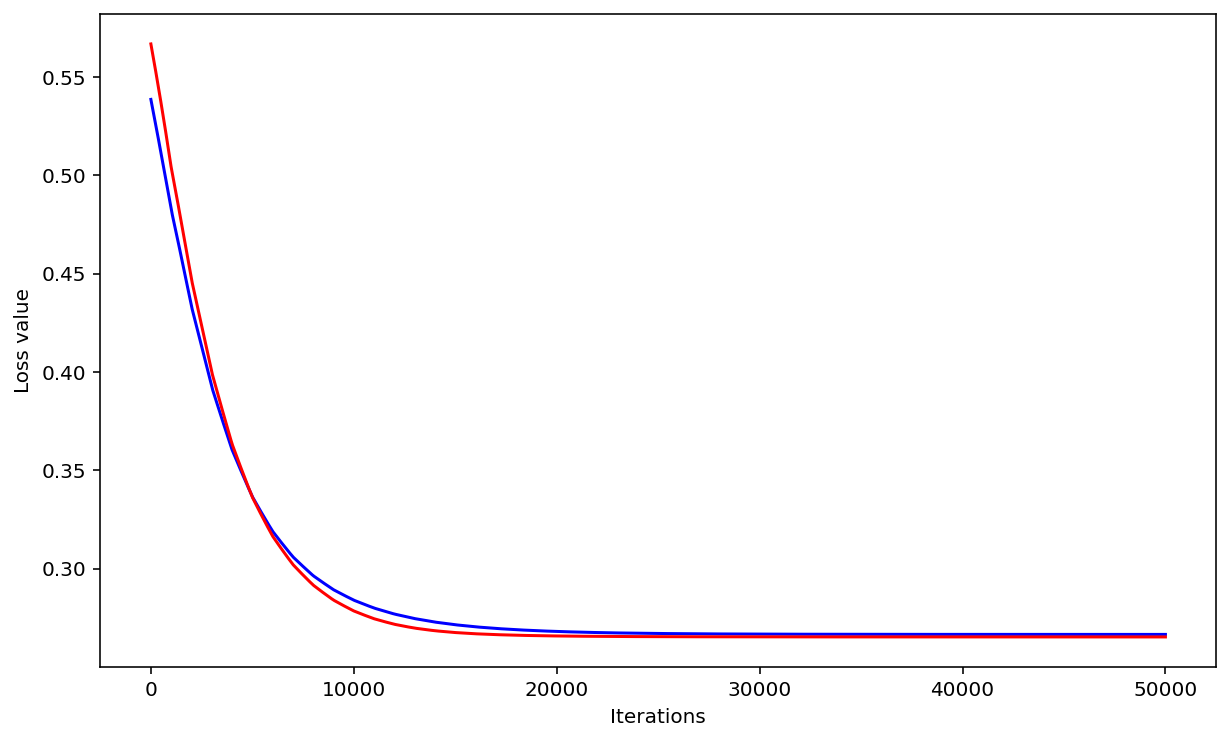

In [284]:
fx1_train = featureFunction(x1_train, number_data_train)
fx2_train = featureFunction(x2_train, number_data_train)

fx1_test = featureFunction(x1_test, number_data_test)
fx2_test = featureFunction(x2_test, number_data_test)

xy_train = makeXY(fx1_train, fx2_train)
xy_test = makeXY(fx1_test, fx2_test)

y_train = data_train[:,2][:,None] # label
y_test = data_test[:,2][:,None] # label 

# run gradient descent algorithm
max_iter = 50000
w_train_0, L_iters_train_0 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[0], max_iter)
w_test_0, L_iters_test_0 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[0], max_iter)

print(L_iters_train_0[max_iter-1])
print(L_iters_test_0[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_0, c = 'blue')
plt.plot(np.array(range(max_iter)), L_iters_test_0, c = 'red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

7-2. lamda : 0.0001

0.26689458026024854
0.26559690467096286


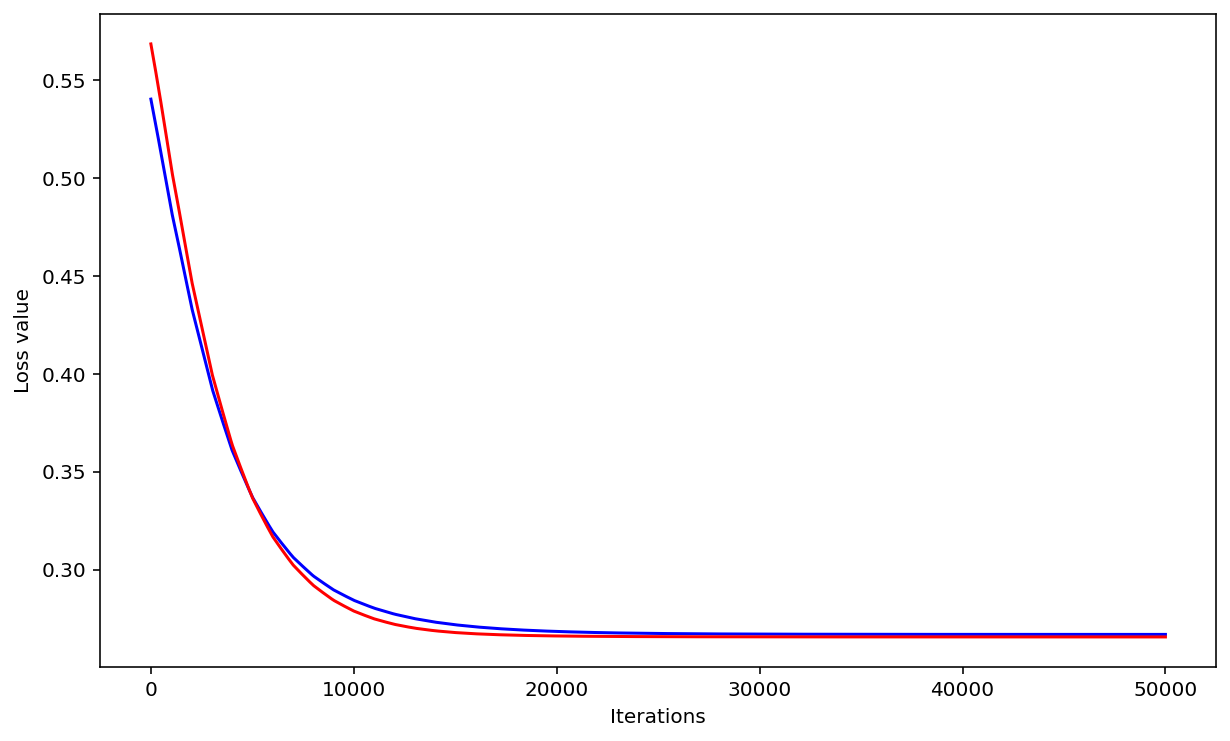

In [286]:
# run gradient descent algorithm
max_iter = 50000
w_train_1, L_iters_train_1 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[1], max_iter)
w_test_1, L_iters_test_1 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[1], max_iter)

print(L_iters_train_1[max_iter-1])
print(L_iters_test_1[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_1, c = 'blue')
plt.plot(np.array(range(max_iter)), L_iters_test_1, c = 'red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

7-3. lamda : 0.001

0.27031853300390524
0.2689309206941963


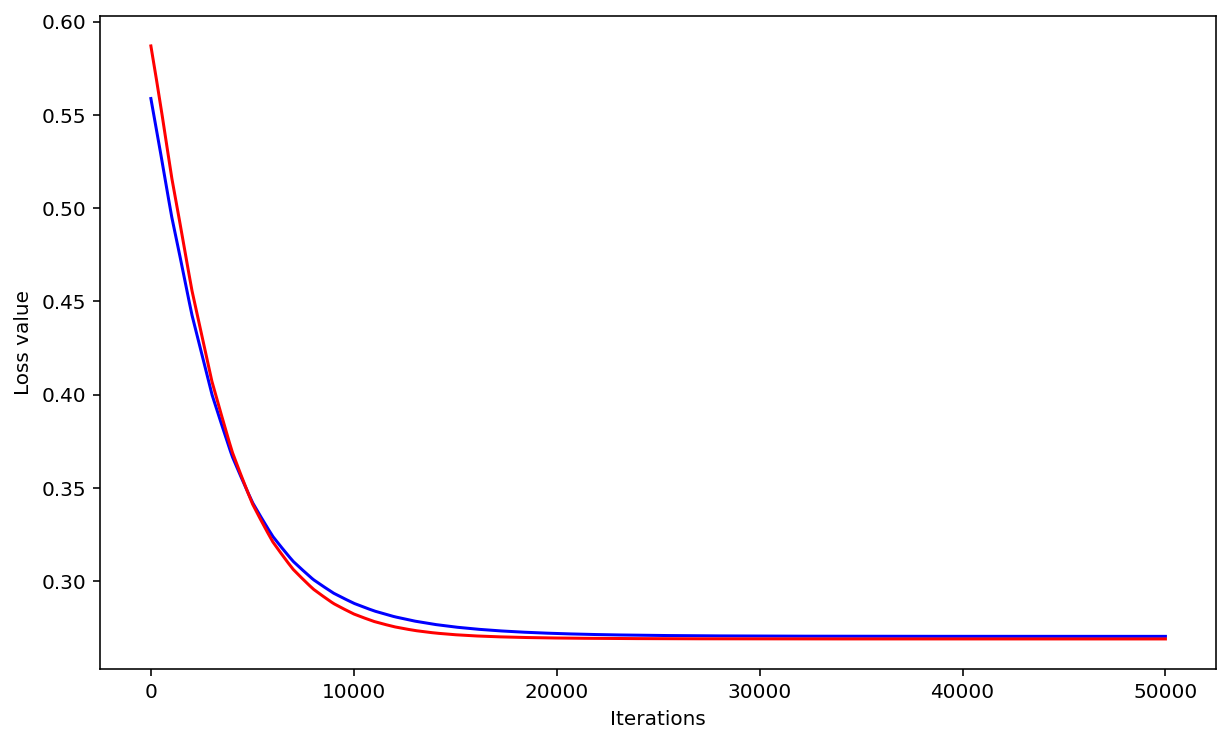

In [287]:
# run gradient descent algorithm
max_iter = 50000
w_train_2, L_iters_train_2 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[2], max_iter)
w_test_2, L_iters_test_2 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[2], max_iter)

print(L_iters_train_2[max_iter-1])
print(L_iters_test_2[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_2, c = 'blue')
plt.plot(np.array(range(max_iter)), L_iters_test_2, c = 'red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

7-4. lamda : 0.01

0.30397182622128033
0.30174676580462956


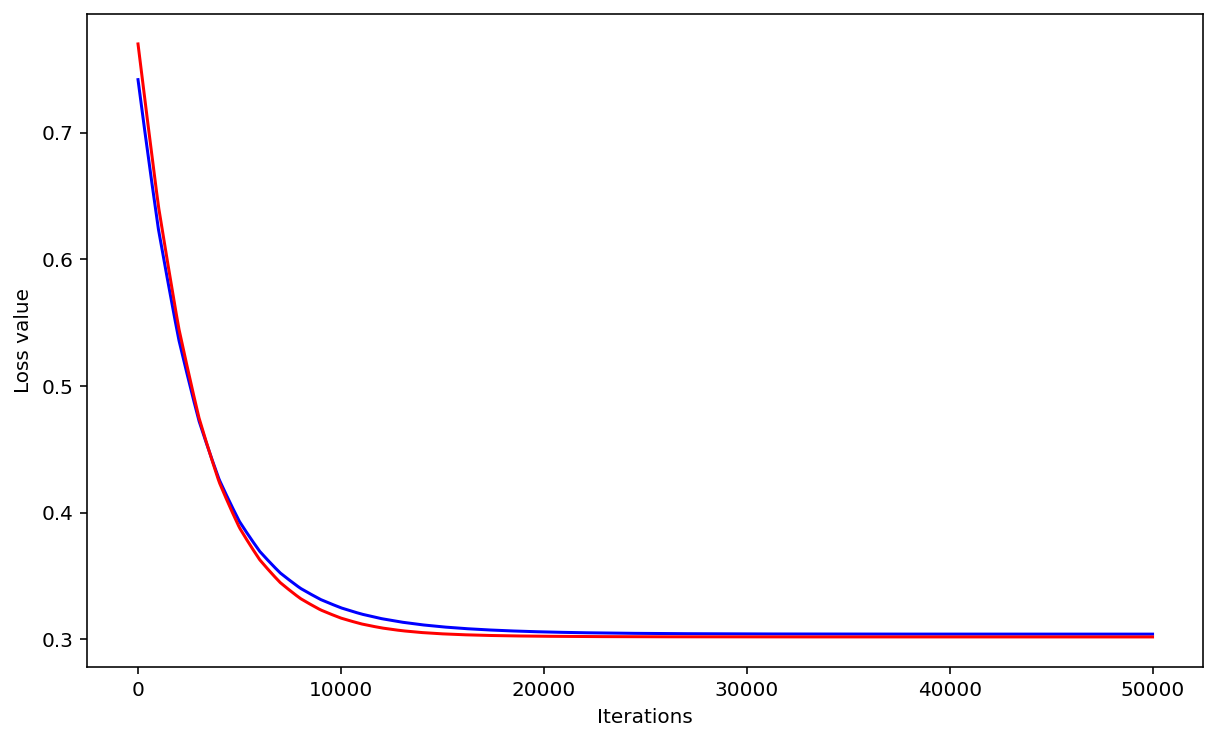

In [288]:
# run gradient descent algorithm
max_iter = 50000
w_train_3, L_iters_train_3 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[3], max_iter)
w_test_3, L_iters_test_3 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[3], max_iter)

print(L_iters_train_3[max_iter-1])
print(L_iters_test_3[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_3, c = 'blue')
plt.plot(np.array(range(max_iter)), L_iters_test_3, c = 'red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

7-5. lamda : 0.1

0.5876950734916169
0.5821398142520612


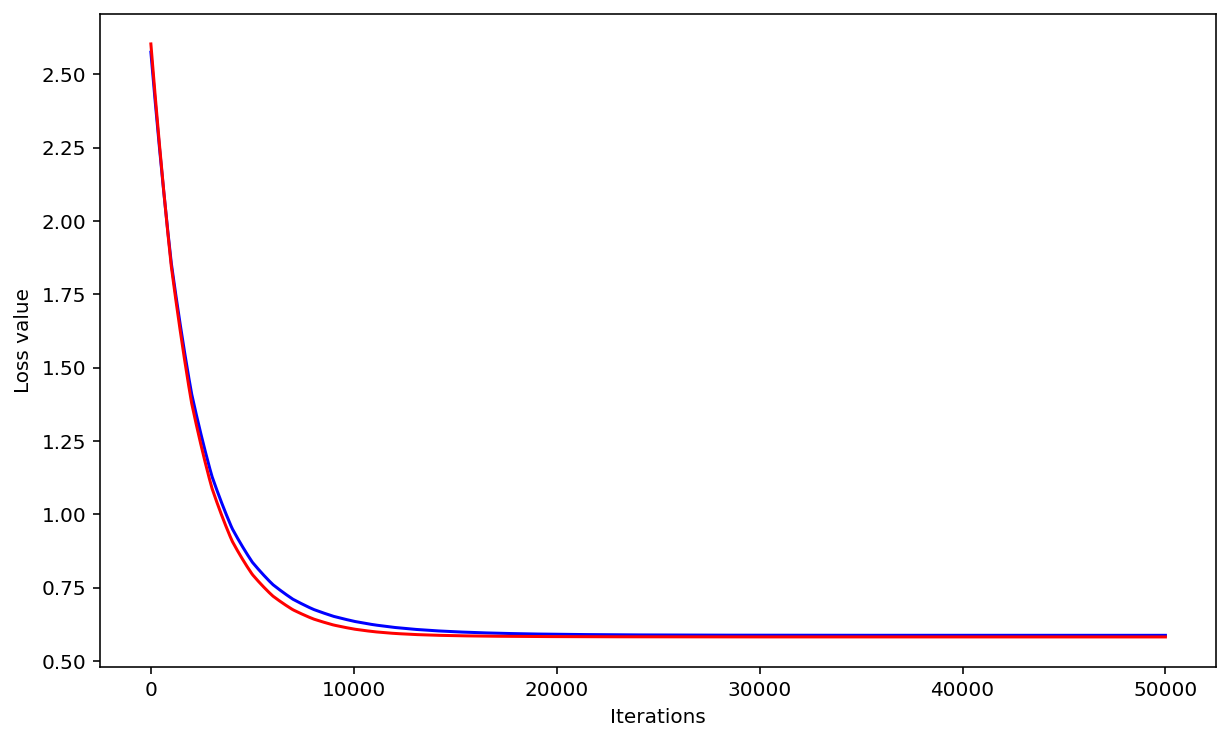

In [289]:
# run gradient descent algorithm
max_iter = 50000
w_train_4, L_iters_train_4 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[4], max_iter)
w_test_4, L_iters_test_4 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[4], max_iter)

print(L_iters_train_4[max_iter-1])
print(L_iters_test_4[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_4, c = 'blue')
plt.plot(np.array(range(max_iter)), L_iters_test_4, c = 'red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 8. Compute the training accuray

the accuracy is computed based on the training data with varying regularization parameters

In [290]:
fx1_train = featureFunction(x1_train, number_data_train)
fx2_train = featureFunction(x2_train, number_data_train)
xy_train = makeXY(fx1_train, fx2_train)
y_train = data_train[:,2][:,None] # label

idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1
n = y_train.size

# lamdas is [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
# w_train_list는 
for i range(lamdas.size):
    


p0 = f_pred(xy_train, w_train_0)
idx_class0_pred = (p0 <= 0.5)
idx_class1_pred = (p0 > 0.5)

idx_class0_correct = 0
idx_class1_correct = 0
for i in range(n):
    if idx_class0_train[i] == idx_class0_pred[i] == True :
        idx_class0_correct += 1
    
    if idx_class1_train[i] == idx_class1_pred[i] == True:
        idx_class1_correct += 1

accuracy = ((idx_class0_correct + idx_class1_correct) / n) * 100

#print(np.sum(idx_wrong))
print('total number of data = ', (n))
print('total number of correctly classified data = ', (idx_class0_correct + idx_class1_correct))
print('accuracy(%) = ',  accuracy)

total number of data =  200
total number of correctly classified data =  170
accuracy(%) =  85.0


## 9. Compute the testing accuracy

## Output
<hr>